# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


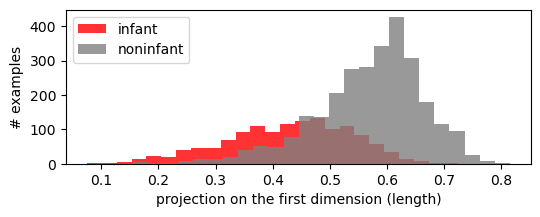

In [3]:
%matplotlib inline
import utils3,numpy

# Load the data
abalone = utils3.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [4]:
def SW(X):
    Z = X-X.mean(axis=0)
    return Z.T@Z

def fisher(X1,X2):
    sw = SW(X1)+SW(X2)
    mu1 = numpy.mean(X1, axis=0)
    mu2 = numpy.mean(X2, axis=0)
    w = numpy.linalg.inv(sw)@(mu2-mu1)
    w /= (w**2).sum()**.5
    return w
    
    
def objective(X1,X2,w):
    sw = SW(X1)+SW(X2)
    mu1 = numpy.mean(X1, axis=0)
    mu2 = numpy.mean(X2, axis=0)
    mu_diff = mu2-mu1
    wsbw = (w@mu_diff)**2
    wsww = w.T@sw@w
    return wsbw/wsww
        
def expand(X):
    idx = numpy.triu_indices(X.shape[1])
    x_exp = numpy.array([numpy.concatenate([x, numpy.outer(x,x)[idx]]) for x in X])
    return x_exp

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

Length: 0.0004797957500328475
Mean Dif: 0.0004995753519750719
Fisher: 0.0005691815990406673
Fisher Quadratic Expansion: 0.000766002500351517


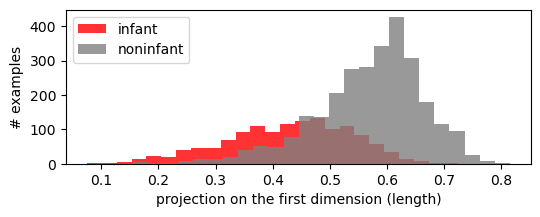

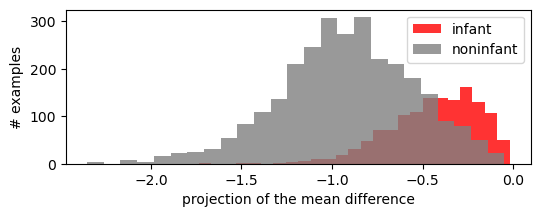

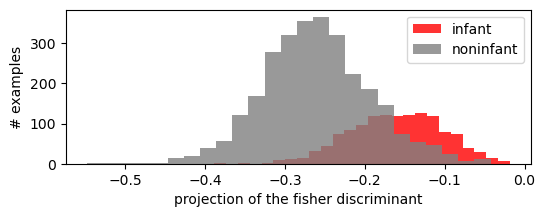

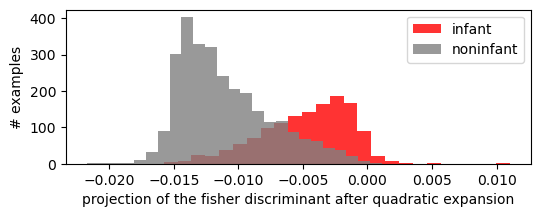

In [5]:
##### REPLACE BY YOUR CODE
# %matplotlib inline
# import solutions
# solutions.analysis()

w1 = numpy.array([1,0,0,0,0,0,0])

print(f'Length: {objective(abalone.I, abalone.N, w1)}')
abalone.plot(w1,'projection on the first dimension (length)')

w2 = numpy.mean(abalone.I, axis=0) - numpy.mean(abalone.N, axis=0) 
print(f'Mean Dif: {objective(abalone.I, abalone.N, w2)}')
abalone.plot(w2, 'projection of the mean difference')

w3 = fisher(abalone.N, abalone.I)
print(f'Fisher: {objective(abalone.I, abalone.N, w3)}')
abalone.plot(w3, 'projection of the fisher discriminant')

w4 = fisher(expand(abalone.N), expand(abalone.I))
print(f'Fisher Quadratic Expansion: {objective(expand(abalone.I), expand(abalone.N), w4)}')
abalone.I = expand(abalone.I)
abalone.N = expand(abalone.N)
abalone.plot(w4, 'projection of the fisher discriminant after quadratic expansion')


#####